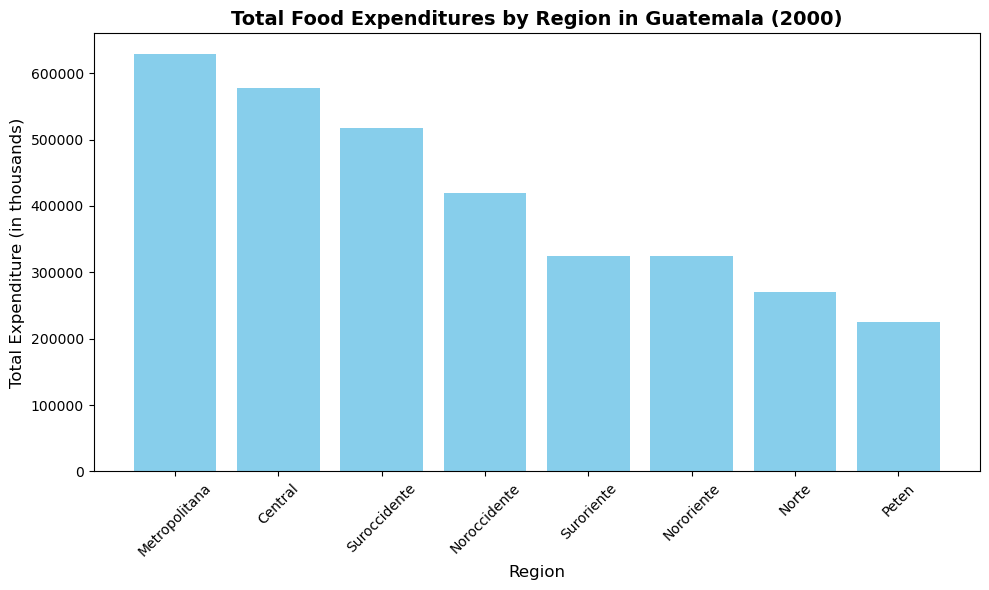

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Load the dataset
file_path = 'Guatemala - Food Expenditures (2000).csv'
food_expenditures_df = pd.read_csv(file_path)

# Summing expenditures by region
region_expenditure = food_expenditures_df.groupby('m')['Expenditure'].sum().reset_index()

# Sorting the regions for a better visual order
region_expenditure = region_expenditure.sort_values(by='Expenditure', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(region_expenditure['m'], region_expenditure['Expenditure'], color='skyblue')

# Adding titles and labels
plt.title('Total Food Expenditures by Region in Guatemala (2000)', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Expenditure (in thousands)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Showing the plot
plt.show()

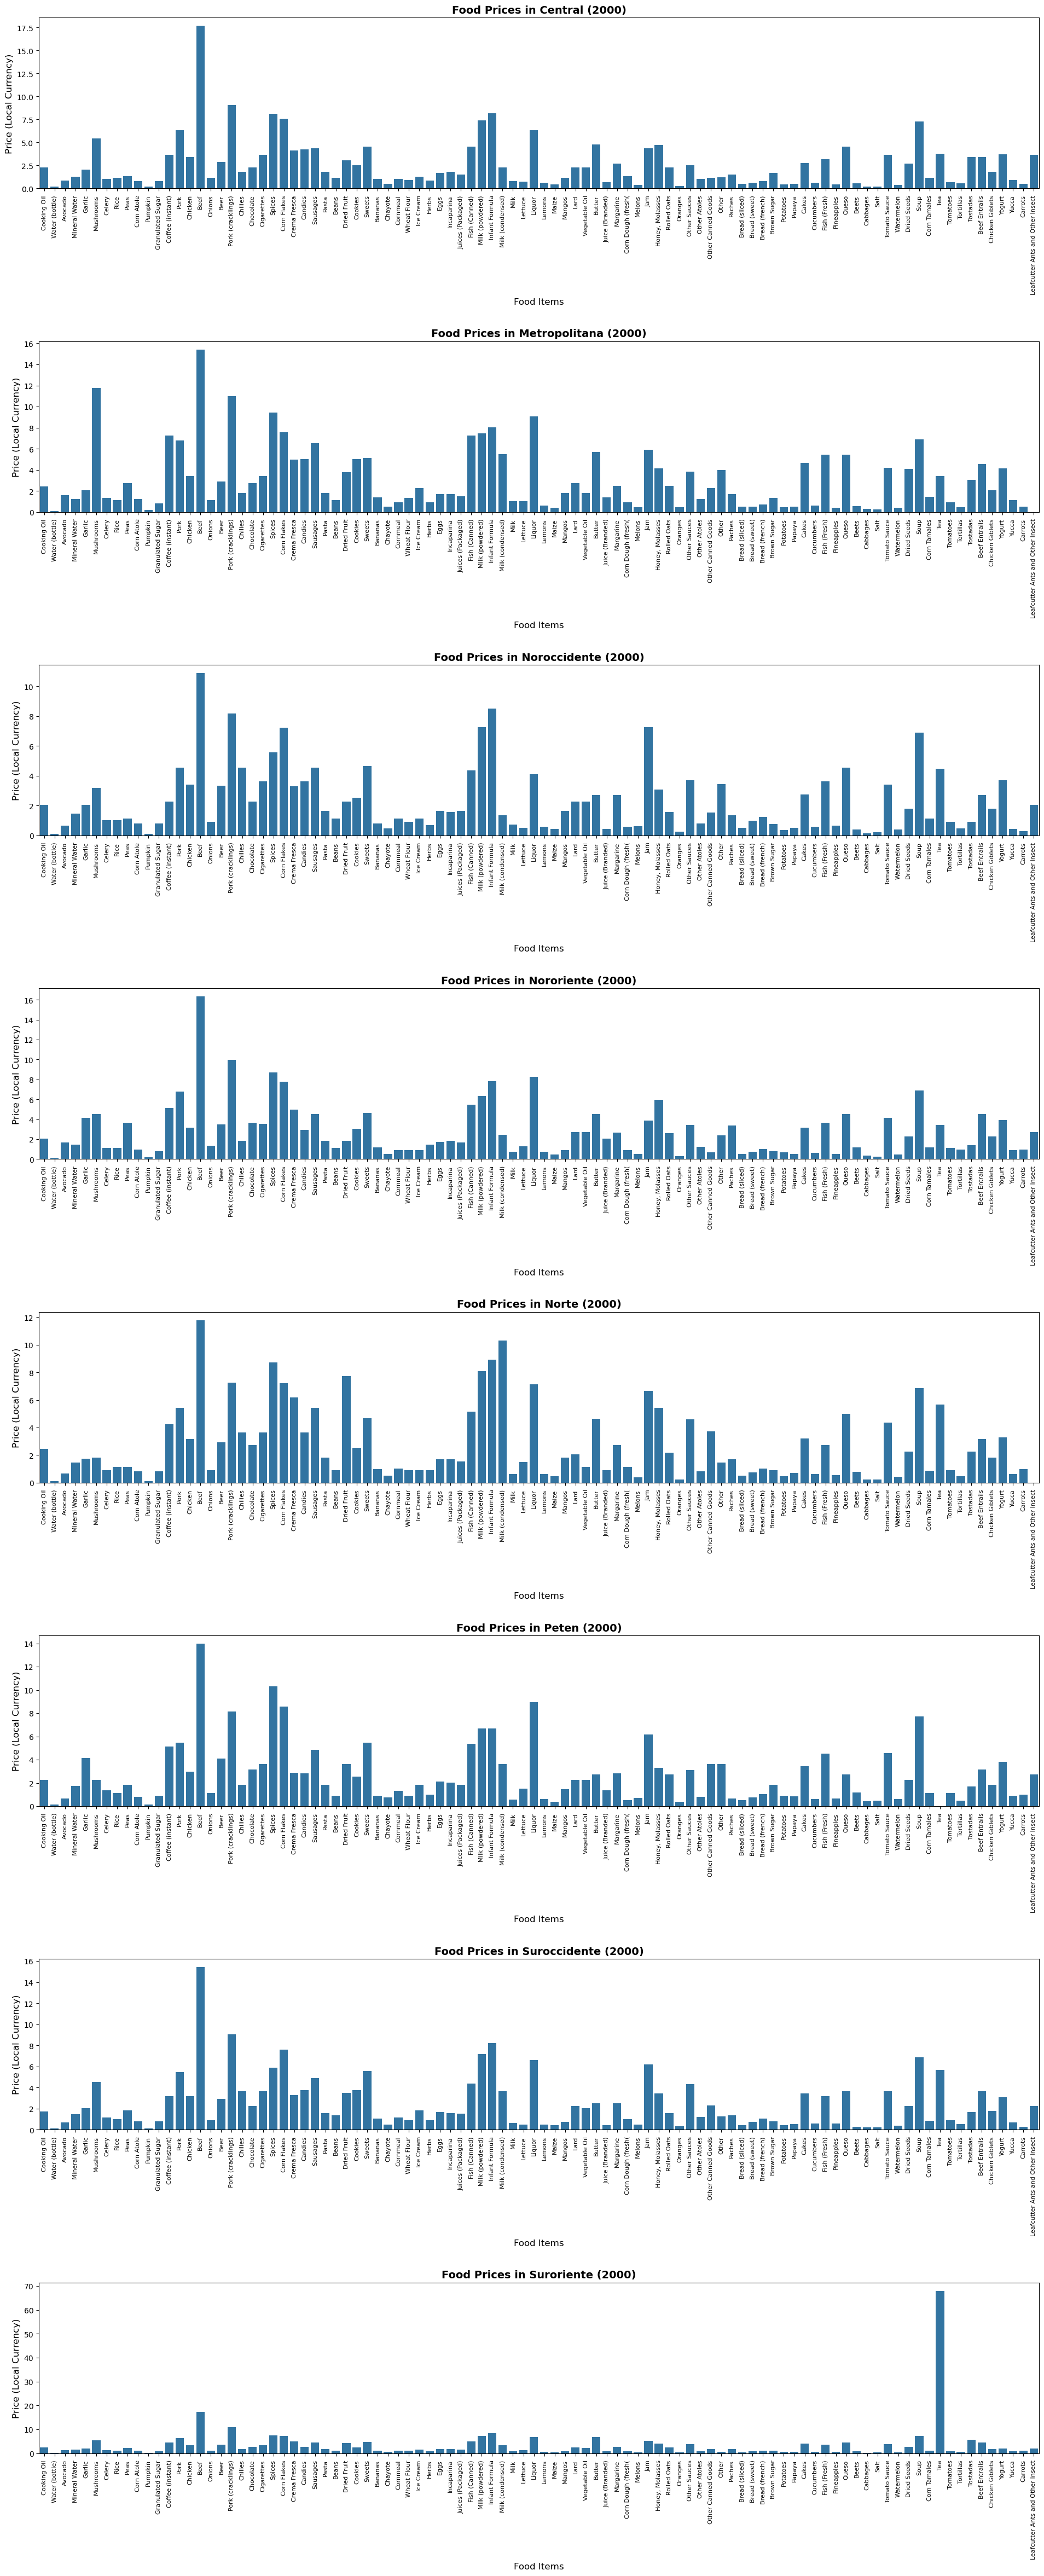

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, message="set_ticklabels")

# Load the dataset
file_path_prices = 'Guatemala - Food Prices (2000).csv'
food_prices_df = pd.read_csv(file_path_prices)

# Set up the matplotlib figure with adjusted dimensions
regions = food_prices_df['m'].unique()
num_regions = len(regions)
fig, axes = plt.subplots(nrows=num_regions, ncols=1, figsize=(20, 6 * num_regions))  # Increased width

# Handle single region case to ensure axes is iterable
if num_regions == 1:
    axes = [axes]

# Create a bar plot for each region with improved label settings
for idx, (region, ax) in enumerate(zip(regions, axes)):
    region_data = food_prices_df[food_prices_df['m'] == region]
    sns.barplot(x='j', y='Price', data=region_data, ax=ax)
    
    ax.set_title(f'Food Prices in {region} (2000)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Food Items', fontsize=12)
    ax.set_ylabel('Price (Local Currency)', fontsize=12)
    
    # Rotate x-tick labels vertically and adjust alignment
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,          # Rotate labels 90 degrees
        ha='center',          # Center-align labels
        fontsize=8            # Reduce font size
    )
    ax.tick_params(axis='x', pad=5)  # Add padding between ticks and labels

# Adjust layout with additional padding to prevent overlap
plt.tight_layout(pad=4.0, h_pad=3.0)  # Increase padding around subplots
plt.show()

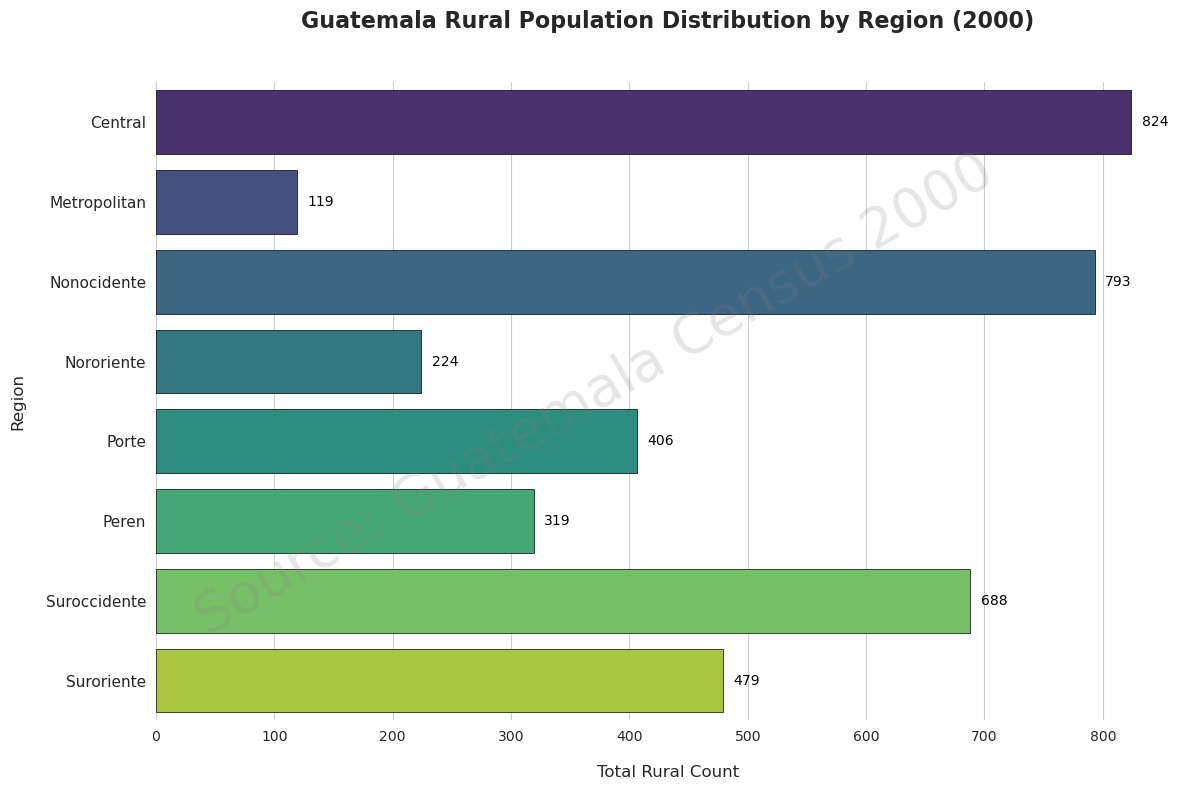

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

data = {
    'Region': ['Central', 'Metropolitan', 'Nonocidente', 'Nororiente', 
              'Porte', 'Peren', 'Suroccidente', 'Suroriente'],
    'Sum_of_Rural': [824, 119, 793, 224, 406, 319, 688, 479]
}
df = pd.DataFrame(data)

# Style settings
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", n_colors=len(df))

# Create horizontal bar plot
ax = sns.barplot(x='Sum_of_Rural', y='Region', data=df, palette=colors, 
                 edgecolor='black', linewidth=0.5)

# Add design elements
plt.title("Guatemala Rural Population Distribution by Region (2000)\n", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Total Rural Count", fontsize=12, labelpad=15)
plt.ylabel("Region", fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=11)

# Add data labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 20, 
            p.get_y() + p.get_height()/2., 
            '{:1.0f}'.format(width), 
            ha='center', va='center',
            fontsize=10, color='black')

# Remove spines
sns.despine(left=True, bottom=True)

# Add watermark
plt.figtext(0.5, 0.5, "Source: Guatemala Census 2000", 
           ha='center', va='center', 
           fontsize=40, color='gray', alpha=0.2,
           rotation=30)

plt.tight_layout()
plt.show()

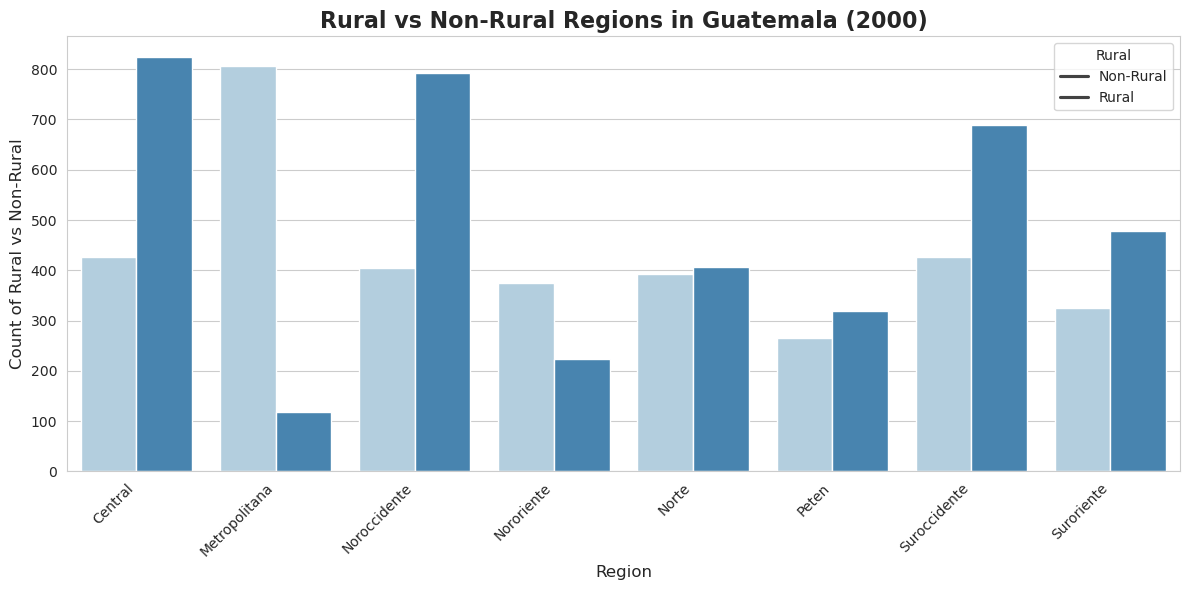

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the "Guatemala - Region Features.csv" dataset
file_path_region_features = 'Guatemala - Region Features.csv'
region_features_df = pd.read_csv(file_path_region_features)

# Group the data by region and rural, count occurrences
region_rural_count = region_features_df.groupby(['m', 'Rural']).size().reset_index(name='Count')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='m', y='Count', hue='Rural', data=region_rural_count, palette="Blues")

# Customize the plot
plt.title('Rural vs Non-Rural Regions in Guatemala (2000)', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count of Rural vs Non-Rural', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(title='Rural', labels=['Non-Rural', 'Rural'], loc='upper right', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

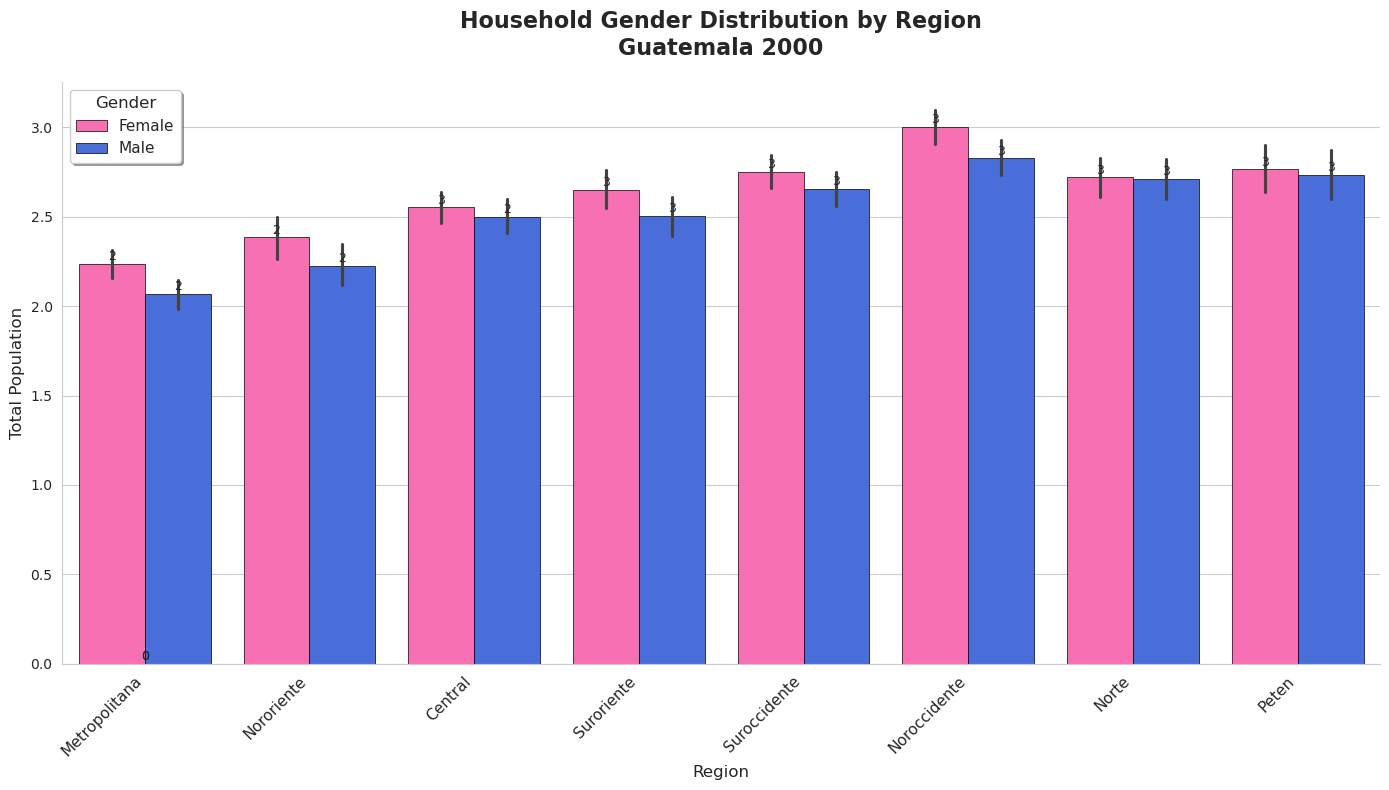

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Guatemala - Household Characteristics.csv")

# Clean data
df = df[df['m'] != 'Grand Total']  # Use actual region column 'm'

# Calculate gender totals across all age groups
female_cols = [col for col in df.columns if 'Females' in col]
male_cols = [col for col in df.columns if 'Males' in col]
df['Total_Female'] = df[female_cols].sum(axis=1)
df['Total_Male'] = df[male_cols].sum(axis=1)

# Melt data for visualization
df_melted = pd.melt(
    df,
    id_vars=['m'],
    value_vars=['Total_Female', 'Total_Male'],
    var_name='Gender',
    value_name='Count'
).replace({'Total_Female':'Female', 'Total_Male':'Male'})

# Create visualization
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
palette = {"Female": "#FF69B4", "Male": "#4169E1"}

ax = sns.barplot(
    x='m',
    y='Count',
    hue='Gender',
    data=df_melted,
    palette=palette,
    saturation=0.9,
    edgecolor='black',
    linewidth=0.5
)

# Style adjustments
plt.title("Household Gender Distribution by Region\nGuatemala 2000", 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Population", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=10)

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=9
    )

# Legend adjustments
ax.legend(title='Gender', frameon=True, shadow=True, 
          fontsize=11, title_fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

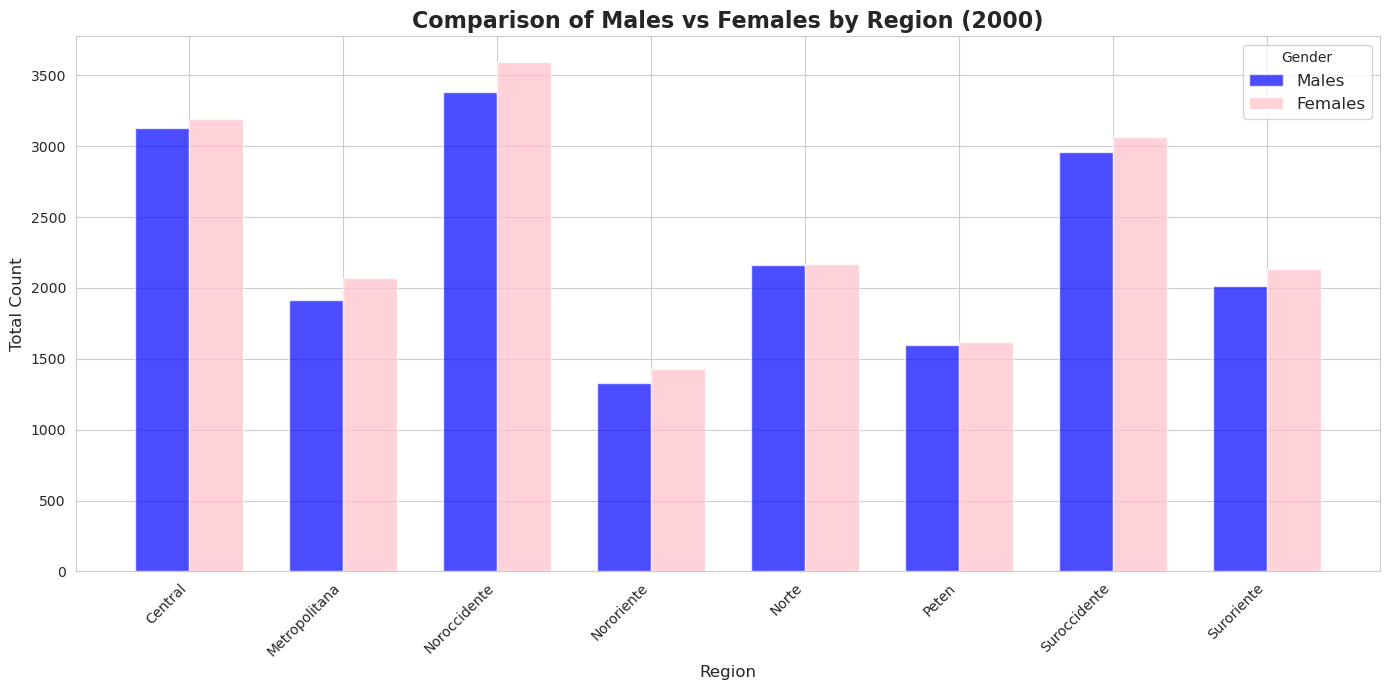

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Re-load the "Guatemala - Household Characteristics.csv" dataset
file_path_household_characteristics = 'Guatemala - Household Characteristics.csv'
household_characteristics_df = pd.read_csv(file_path_household_characteristics)

# Group the data by region and sum the male and female counts for each age group
grouped_data = household_characteristics_df.groupby('m').agg({
    'Males 00-03': 'sum', 'Females 00-03': 'sum', 
    'Males 04-08': 'sum', 'Females 04-08': 'sum',
    'Males 09-13': 'sum', 'Females 09-13': 'sum',
    'Males 14-18': 'sum', 'Females 14-18': 'sum',
    'Males 19-30': 'sum', 'Females 19-30': 'sum',
    'Males 31-50': 'sum', 'Females 31-50': 'sum',
    'Males 51-99': 'sum', 'Females 51-99': 'sum'
}).reset_index()

# Plot the data with adjusted bar positioning to avoid overlap
plt.figure(figsize=(14, 7))

# Define the positions for male and female bars with slight offset
male_data = grouped_data.iloc[:, 1::2].sum(axis=1)  # Sum of all male groups
female_data = grouped_data.iloc[:, 2::2].sum(axis=1)  # Sum of all female groups

# Adjust the position of the bars by shifting them slightly to avoid overlap
bar_width = 0.35  # Define the width of the bars
index = range(len(grouped_data))

# Plot males
plt.bar([i - bar_width/2 for i in index], male_data, label='Males', color='blue', alpha=0.7, width=bar_width)

# Plot females
plt.bar([i + bar_width/2 for i in index], female_data, label='Females', color='pink', alpha=0.7, width=bar_width)

# Customize the plot
plt.title('Comparison of Males vs Females by Region (2000)', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(index, grouped_data['m'], rotation=45, ha='right', fontsize=10)
plt.legend(title='Gender', fontsize=12)

# Adjust layout to ensure there's enough space
plt.tight_layout()
plt.show()

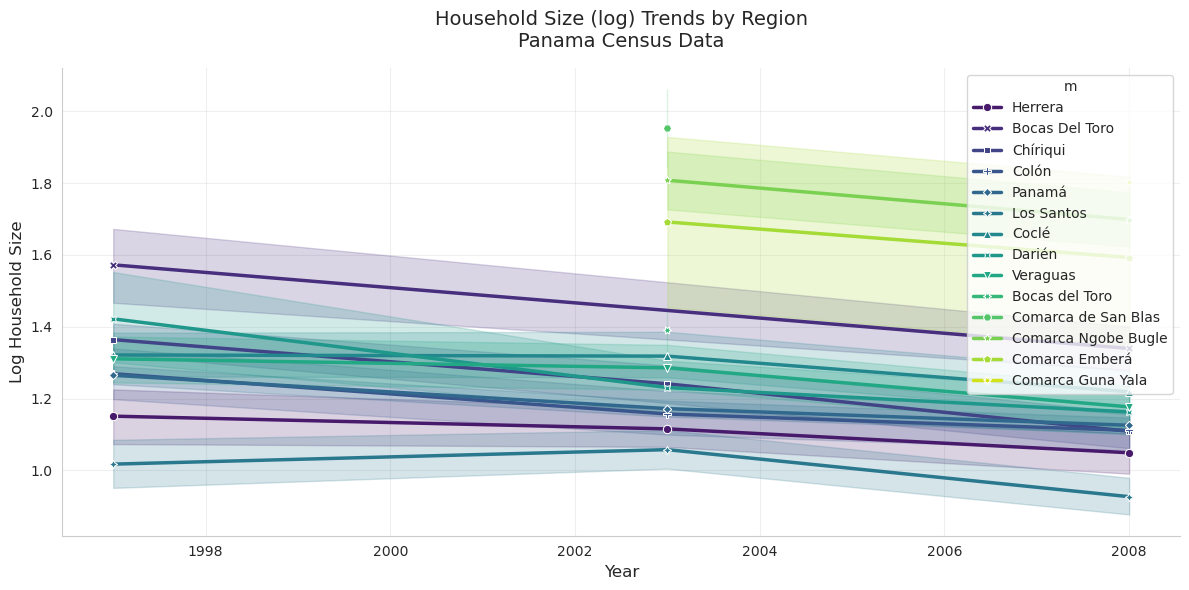

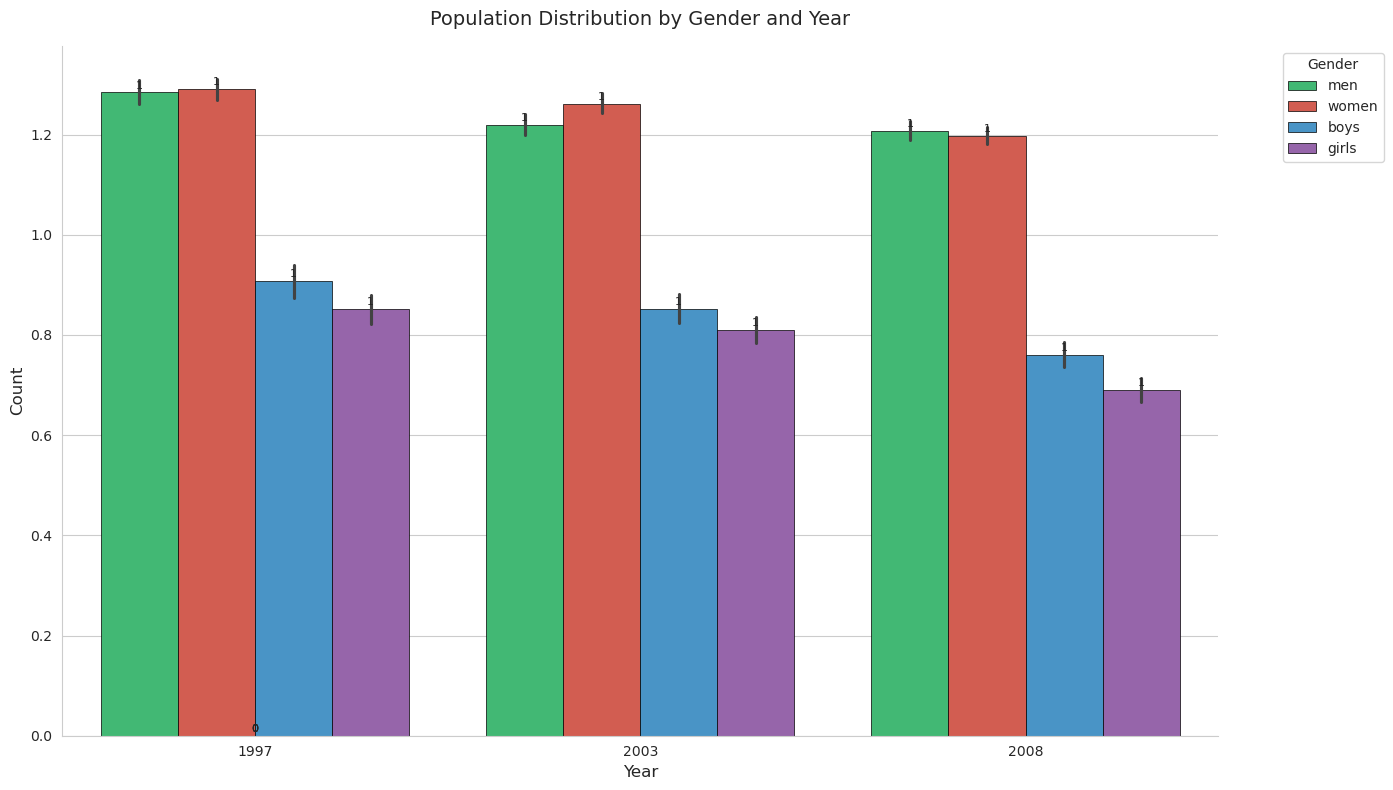

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Panama - Household Characteristics.csv")

# Clean data
df = df[df['m'] != 'Grand Total']  # Remove grand total row
df = df[df['t'].isin([1997, 2003, 2008])]  # Filter relevant years

# 1. Household Size Trend by Region
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='t',
    y='log HSize',
    hue='m',
    style='m',
    markers=True,
    dashes=False,
    linewidth=2.5,
    palette='viridis'
)
plt.title("Household Size (log) Trends by Region\nPanama Census Data", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Log Household Size", fontsize=12)
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

# 2. Gender Distribution by Year
# Aggregate data
gender_df = df.melt(
    id_vars=['t', 'm'],
    value_vars=['men', 'women', 'boys', 'girls'],
    var_name='Gender',
    value_name='Count'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=gender_df,
    x='t',
    y='Count',
    hue='Gender',
    palette={'men':'#2ecc71', 'women':'#e74c3c', 'boys':'#3498db', 'girls':'#9b59b6'},
    edgecolor='black',
    linewidth=0.5
)

plt.title("Population Distribution by Gender and Year", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=8
    )

sns.despine()
plt.tight_layout()
plt.show()

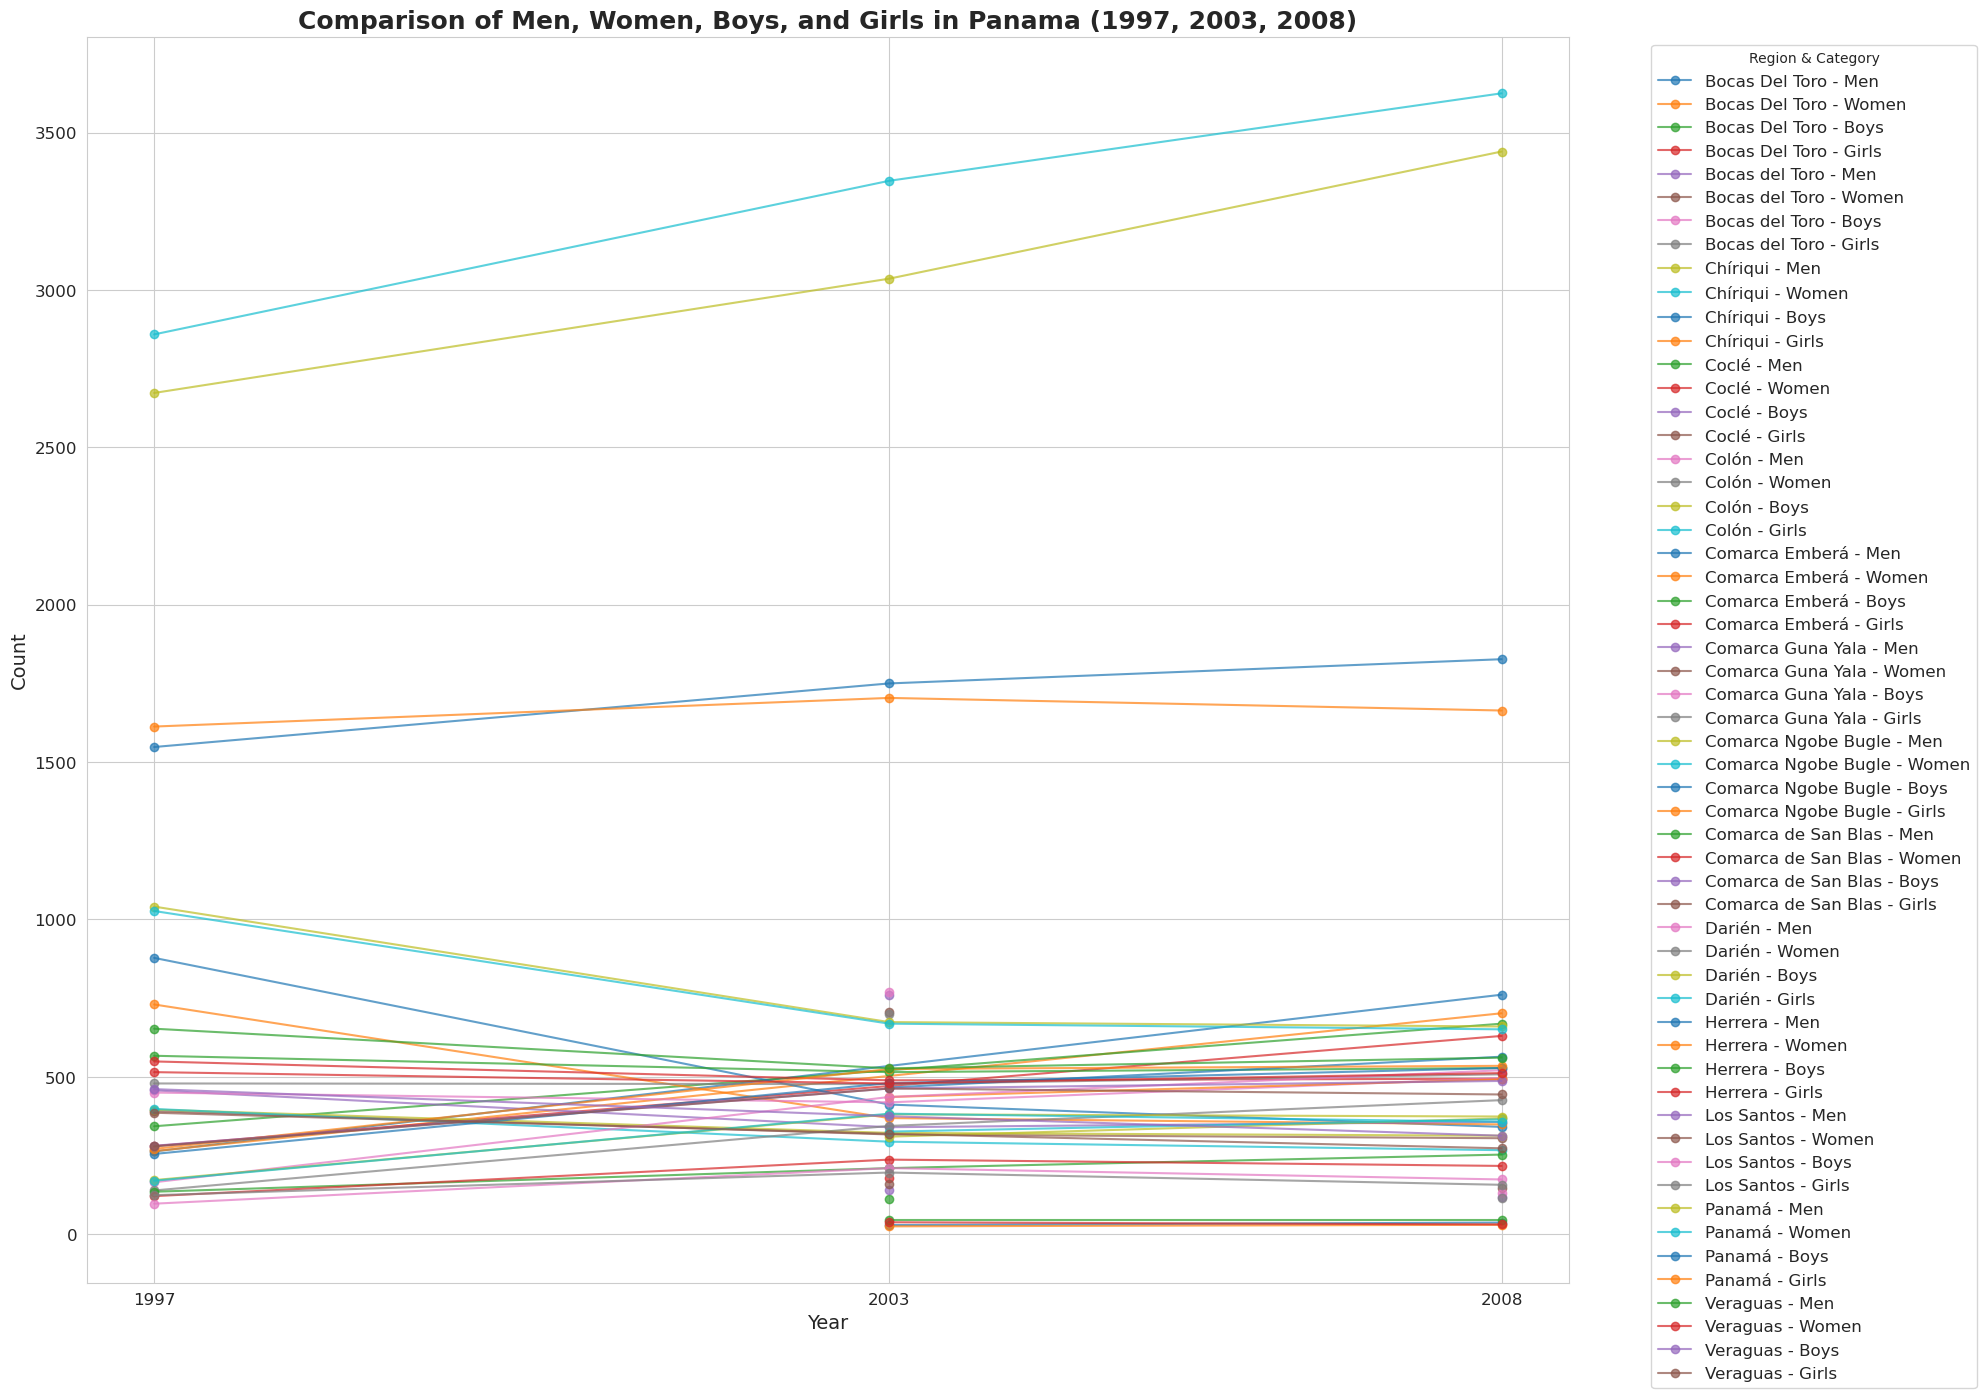

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the "Panama - Household Characteristics.csv" dataset
file_path_panama = 'Panama - Household Characteristics.csv'
panama_household_df = pd.read_csv(file_path_panama)

# Filter the data for the years 1997, 2003, and 2008
filtered_data = panama_household_df[panama_household_df['t'].isin([1997, 2003, 2008])]

# Group by region and year, and aggregate the data for men, women, boys, and girls
grouped_data = filtered_data.groupby(['m', 't']).agg({
    'men': 'sum',
    'women': 'sum',
    'boys': 'sum',
    'girls': 'sum'
}).reset_index()

# Adjust the plot size and layout for better visibility
plt.figure(figsize=(20, 15))  # Make the plot much wider

# Plot each category (men, women, boys, girls) over the years for each region
for region in grouped_data['m'].unique():
    region_data = grouped_data[grouped_data['m'] == region]
    
    # Plot for each gender/age group (men, women, boys, girls)
    plt.plot(region_data['t'], region_data['men'], marker='o', label=f'{region} - Men', linestyle='-', alpha=0.7)
    plt.plot(region_data['t'], region_data['women'], marker='o', label=f'{region} - Women', linestyle='-', alpha=0.7)
    plt.plot(region_data['t'], region_data['boys'], marker='o', label=f'{region} - Boys', linestyle='-', alpha=0.7)
    plt.plot(region_data['t'], region_data['girls'], marker='o', label=f'{region} - Girls', linestyle='-', alpha=0.7)

# Customize the plot
plt.title('Comparison of Men, Women, Boys, and Girls in Panama (1997, 2003, 2008)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([1997, 2003, 2008], fontsize=12)
plt.yticks(fontsize=12)

# Move the legend outside the plot area to avoid overlap
plt.legend(title='Region & Category', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to ensure enough space for the legend and labels
plt.tight_layout()

# Show the plot
plt.show()

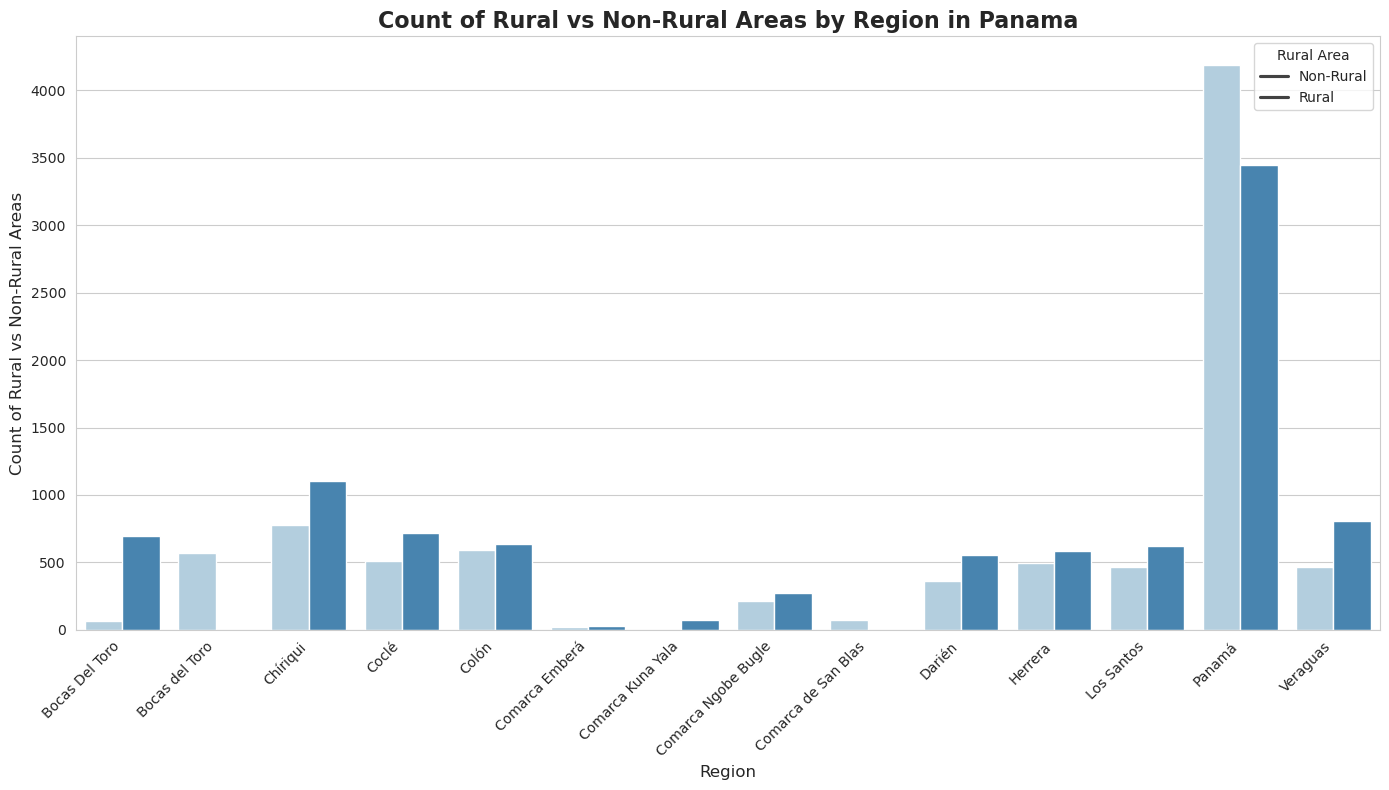

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the "Panama - Region Features.csv" dataset
file_path_region_features = 'Panama - Region Features.csv'
panama_region_features_df = pd.read_csv(file_path_region_features)

# Group the data by region and sum the rural and non-rural counts
region_rural_count = panama_region_features_df.groupby(['m', 'Rural']).size().reset_index(name='Count')

# Plot the data
plt.figure(figsize=(14, 8))

# Plot the count of rural vs non-rural for each region
sns.barplot(x='m', y='Count', hue='Rural', data=region_rural_count, palette="Blues")

# Customize the plot
plt.title('Count of Rural vs Non-Rural Areas by Region in Panama', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count of Rural vs Non-Rural Areas', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(title='Rural Area', labels=['Non-Rural', 'Rural'], loc='upper right', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

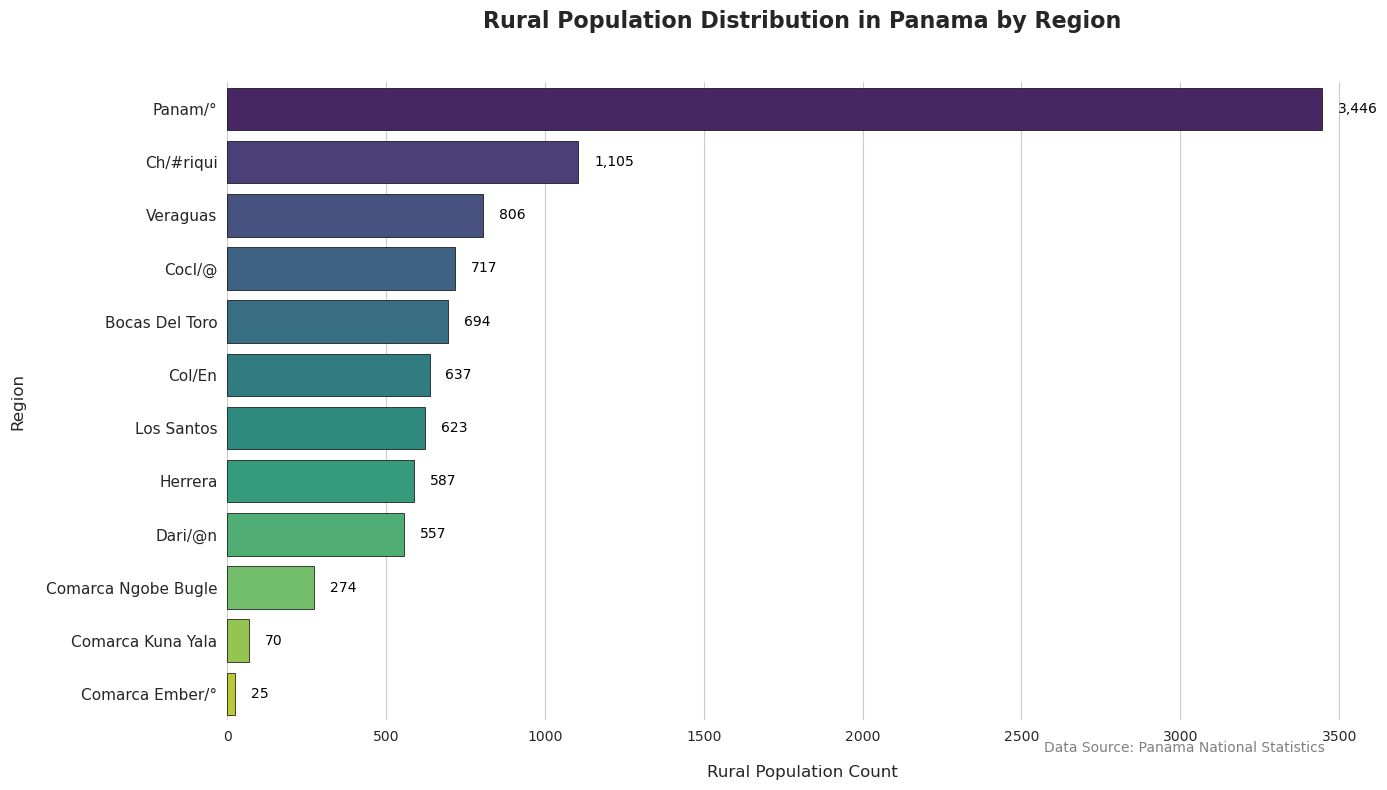

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data recreation
data = {
    'Region': ['Bocas Del Toro', 'Ch/#riqui', 'Cocl/@', 'Col/En', 
              'Comarca de San Blas', 'Comarca Ember/°', 'Comarca Kuna Yala',
              'Comarca Ngobe Bugle', 'Dari/@n', 'Herrera', 'Los Santos',
              'Panam/°', 'Veraguas'],
    'Rural Population': [694, 1105, 717, 637, 0, 25, 70, 274, 557, 587, 623, 3446, 806]
}
df = pd.DataFrame(data)

# Filter out zero values and sort
df = df[df['Rural Population'] > 0].sort_values('Rural Population', ascending=False)

# Style settings
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
colors = sns.color_palette("viridis", n_colors=len(df))

# Create horizontal bar plot
ax = sns.barplot(x='Rural Population', y='Region', data=df, 
                palette=colors, edgecolor='black', linewidth=0.5)

# Add design elements
plt.title("Rural Population Distribution in Panama by Region\n", 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Rural Population Count", fontsize=12, labelpad=15)
plt.ylabel("Region", fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=11)

# Add data labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 50, 
            p.get_y() + p.get_height()/2., 
            f'{width:,.0f}', 
            ha='left', va='center',
            fontsize=10, color='black')

# Add context
plt.figtext(0.95, 0.05, "Data Source: Panama National Statistics", 
           ha='right', va='bottom', fontsize=10, color='gray')

# Remove spines and adjust layout
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

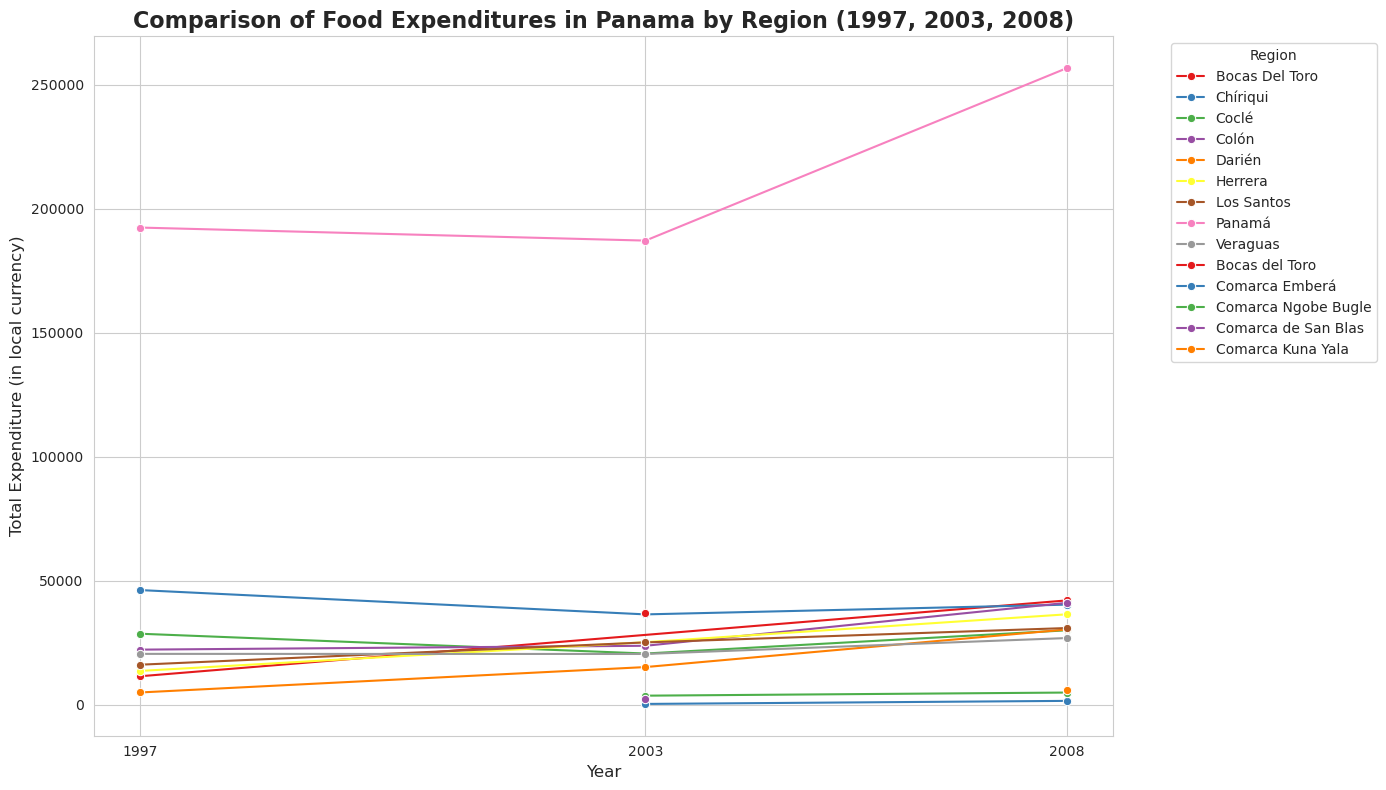

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the food expenditures datasets for the years 1997, 2003, and 2008
file_path_1997 = 'Panama - Food Expenditures (1997).csv'
file_path_2003 = 'Panama - Food Expenditures (2003).csv'
file_path_2008 = 'Panama - Food Expenditures (2008).csv'

expenditures_1997 = pd.read_csv(file_path_1997)
expenditures_2003 = pd.read_csv(file_path_2003)
expenditures_2008 = pd.read_csv(file_path_2008)

# Add the 'Year' column to each dataset
expenditures_1997['Year'] = 1997
expenditures_2003['Year'] = 2003
expenditures_2008['Year'] = 2008

# Concatenate the datasets
combined_expenditures = pd.concat([expenditures_1997, expenditures_2003, expenditures_2008])

# Group the data by year and region, summing the expenditures
region_yearly_expenditures = combined_expenditures.groupby(['Year', 'm']).agg({'Expenditure': 'sum'}).reset_index()

# Plot the data
plt.figure(figsize=(14, 8))

# Create a line plot to compare expenditures over time for each region
sns.lineplot(x='Year', y='Expenditure', hue='m', data=region_yearly_expenditures, marker='o', palette='Set1')

# Customize the plot
plt.title('Comparison of Food Expenditures in Panama by Region (1997, 2003, 2008)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Expenditure (in local currency)', fontsize=12)
plt.xticks([1997, 2003, 2008], fontsize=10)
plt.legend(title='Region', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

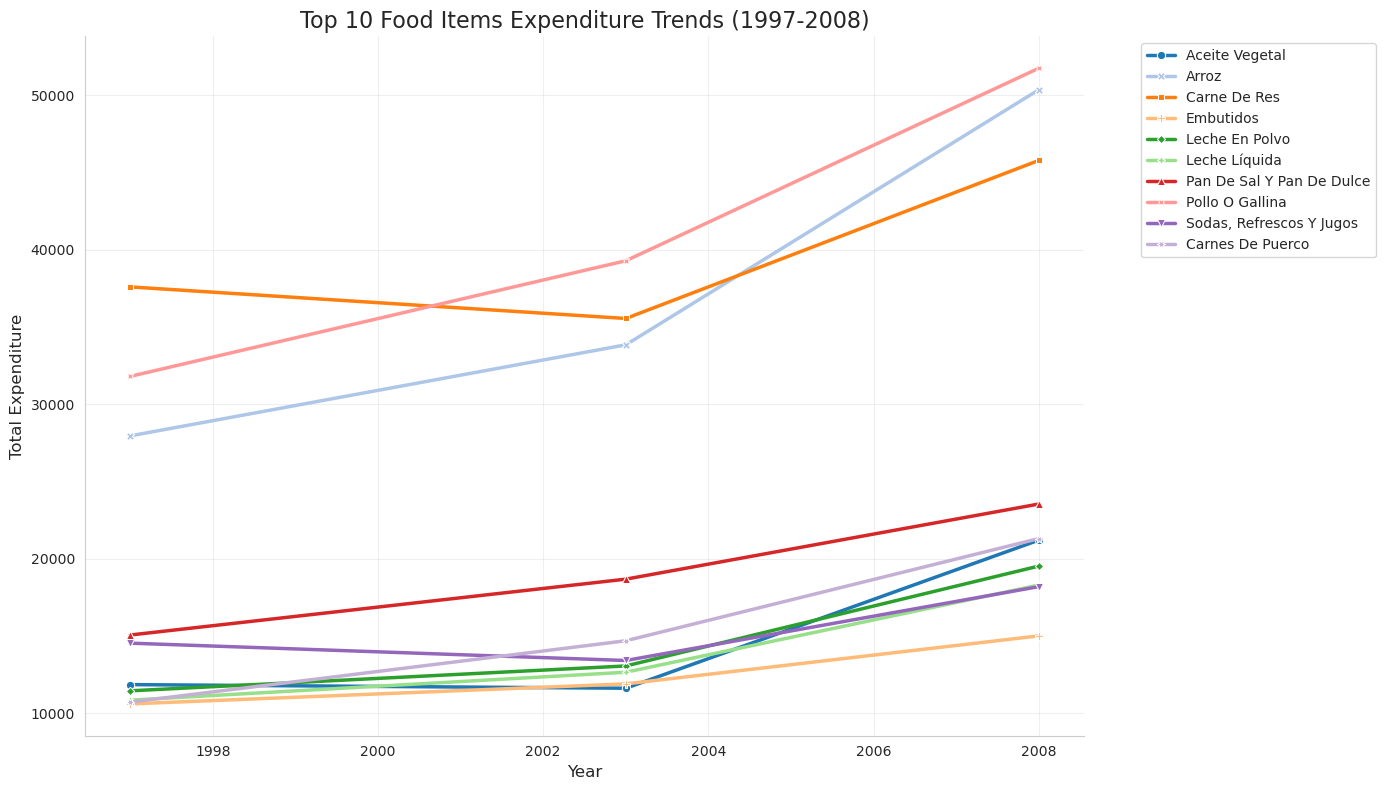

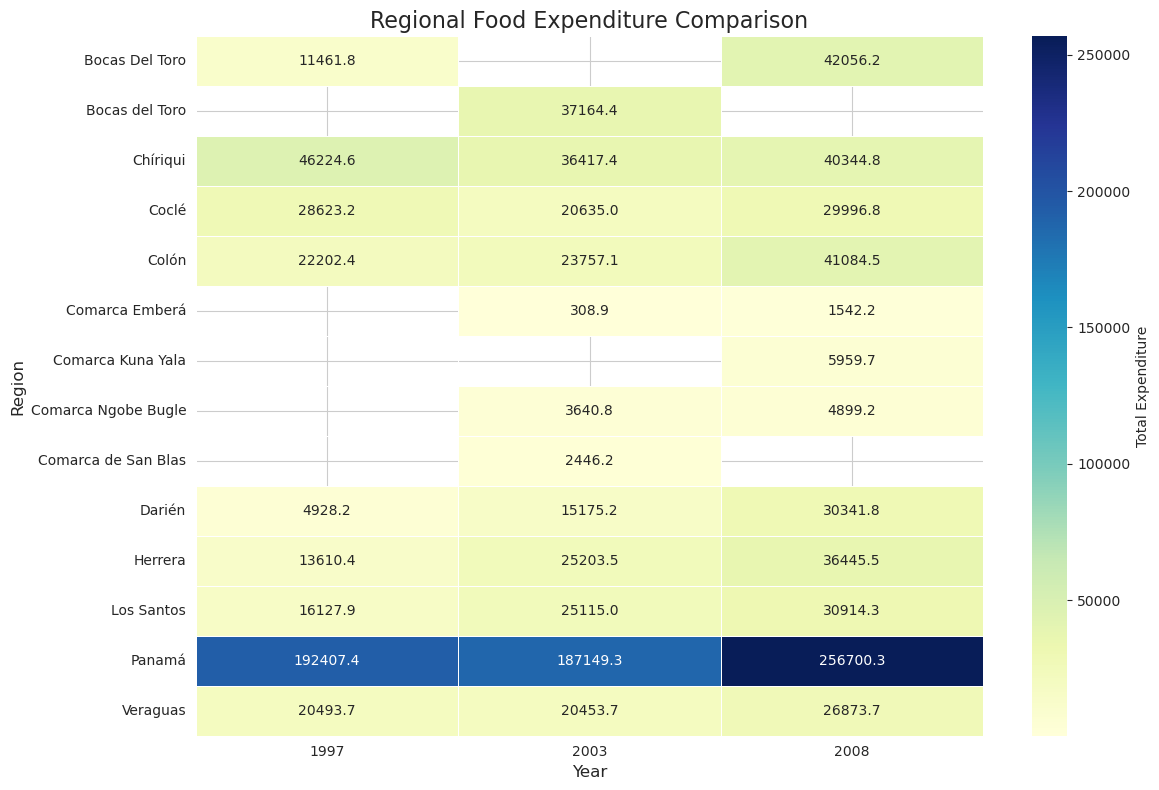

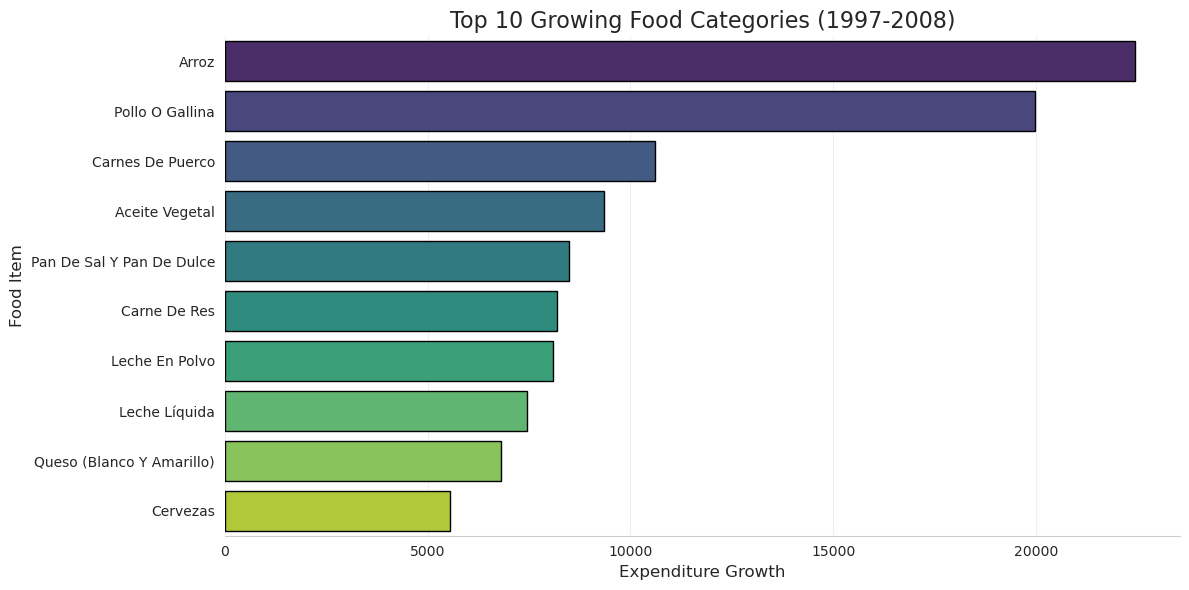

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and combine datasets
years = [1997, 2003, 2008]
dfs = []

for year in years:
    df = pd.read_csv(f'Panama - Food Expenditures ({year}).csv')
    df['Year'] = year  # Add year column
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Clean data
combined_df.columns = [col.strip() for col in combined_df.columns]
combined_df = combined_df[['Year', 'm', 'j', 'Expenditure']]
combined_df = combined_df.rename(columns={'m': 'Region', 'j': 'Food Item'})

# Create top food items analysis
plt.figure(figsize=(14, 8))
top_items = combined_df.groupby('Food Item')['Expenditure'].sum().nlargest(10).index

sns.lineplot(
    data=combined_df[combined_df['Food Item'].isin(top_items)],
    x='Year',
    y='Expenditure',
    hue='Food Item',
    style='Food Item',
    markers=True,
    dashes=False,
    linewidth=2.5,
    palette='tab20',
    estimator='sum',
    ci=None
)
plt.title("Top 10 Food Items Expenditure Trends (1997-2008)", fontsize=16)
plt.ylabel("Total Expenditure", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

# Create regional comparison heatmap
regional_pivot = combined_df.groupby(['Region', 'Year'])['Expenditure'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(
    regional_pivot,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Total Expenditure'}
)
plt.title("Regional Food Expenditure Comparison", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.tight_layout()
plt.show()

# Create food category growth analysis
growth_df = combined_df.groupby(['Food Item', 'Year'])['Expenditure'].sum().unstack()
growth_df['Growth_97-08'] = growth_df[2008] - growth_df[1997]
growth_df = growth_df.sort_values('Growth_97-08', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Growth_97-08',
    y=growth_df.index,
    data=growth_df,
    palette="viridis",
    edgecolor='black'
)
plt.title("Top 10 Growing Food Categories (1997-2008)", fontsize=16)
plt.xlabel("Expenditure Growth", fontsize=12)
plt.ylabel("Food Item", fontsize=12)
plt.grid(axis='x', alpha=0.3)
sns.despine(left=True)
plt.tight_layout()
plt.show()

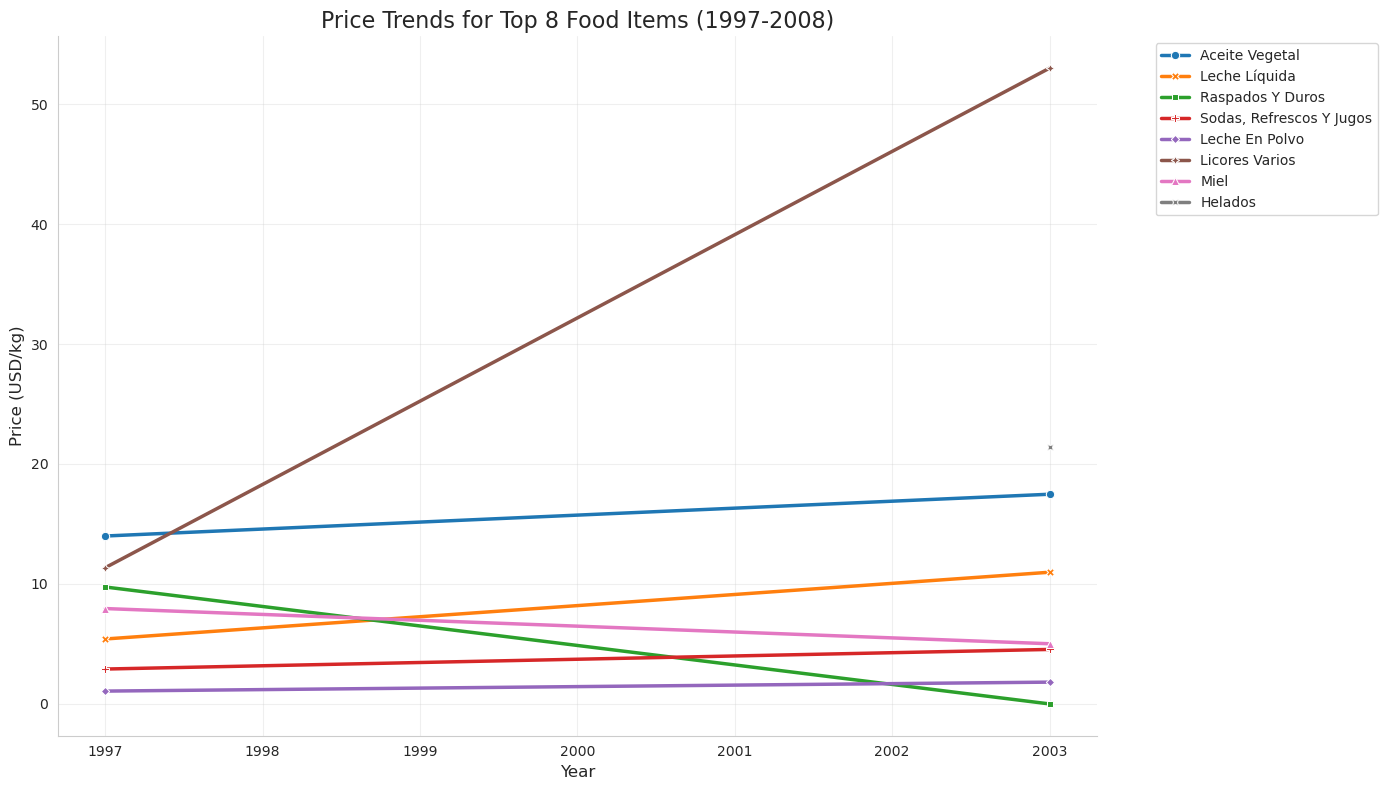

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and combine datasets
years = [1997, 2003, 2008]
dfs = []

for year in years:
    df = pd.read_csv(f'Panama - Food Prices ({year}).csv')
    dfs.append(df)

combined = pd.concat(dfs, ignore_index=True)

# Clean and prepare data
combined.columns = [col.strip() for col in combined.columns]
combined = combined.rename(columns={
    't': 'Year',
    'm': 'Region',
    'j': 'Food_Item',
    'u': 'Unit',
    'price': 'Price'
})

# Convert Year to numeric and filter valid years
combined['Year'] = pd.to_numeric(combined['Year'], errors='coerce')
combined = combined.dropna(subset=['Year'])
combined['Year'] = combined['Year'].astype(int)

# 1. Price Trends for Top Food Items
plt.figure(figsize=(14, 8))
top_items = combined.groupby('Food_Item')['Price'].mean().nlargest(8).index

sns.lineplot(
    data=combined[combined['Food_Item'].isin(top_items)],
    x='Year',
    y='Price',
    hue='Food_Item',
    style='Food_Item',
    markers=True,
    dashes=False,
    linewidth=2.5,
    palette='tab10',
    estimator='median',
    ci=None
)
plt.title("Price Trends for Top 8 Food Items (1997-2008)", fontsize=16)
plt.ylabel("Price (USD/kg)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

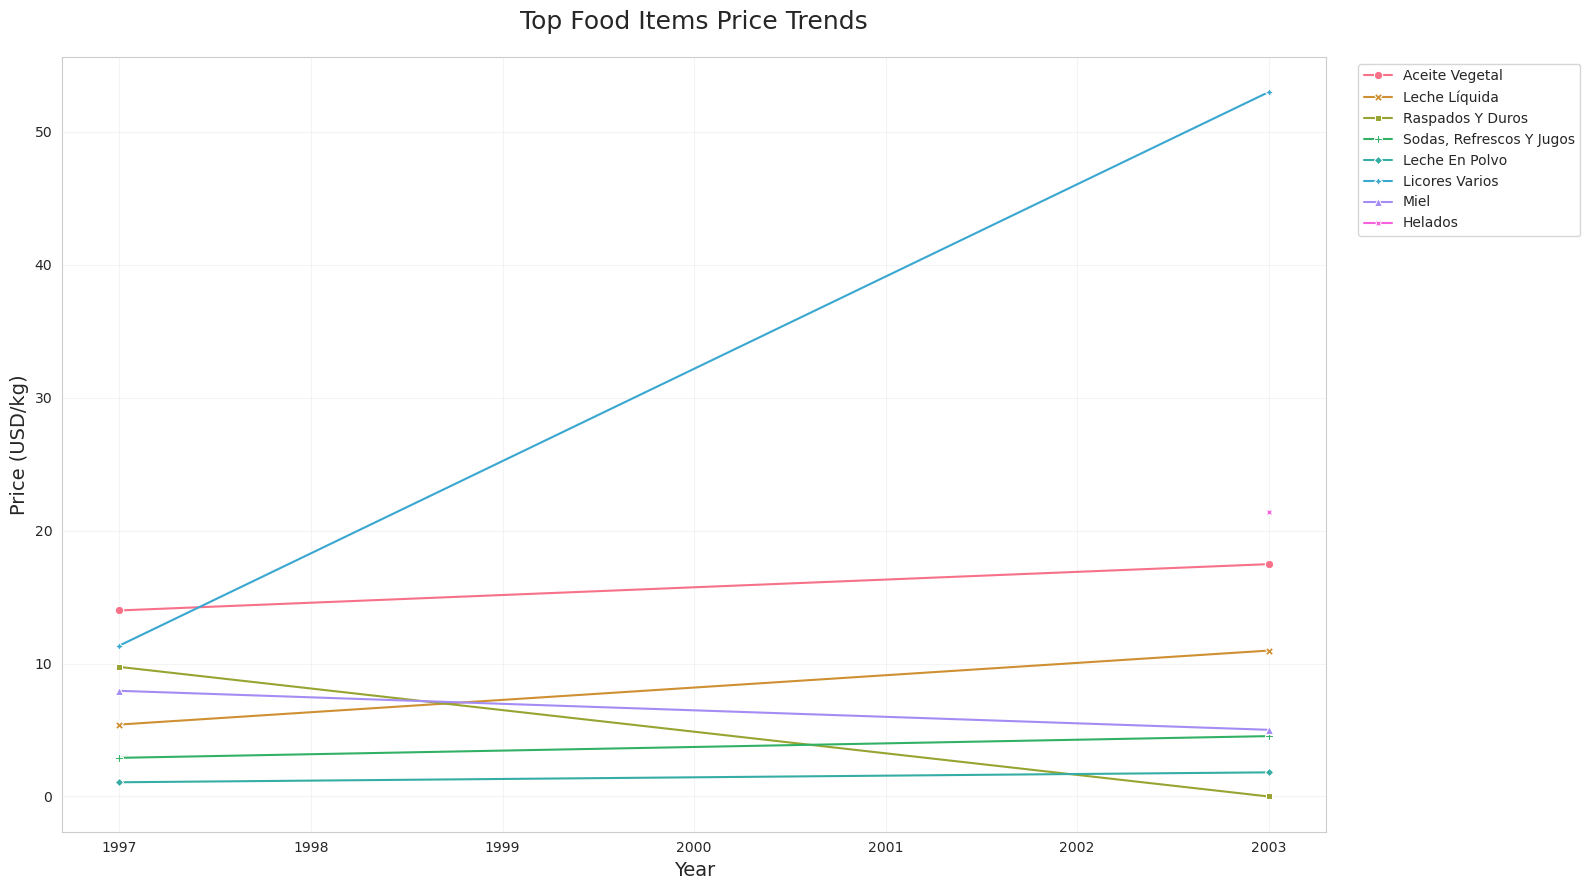

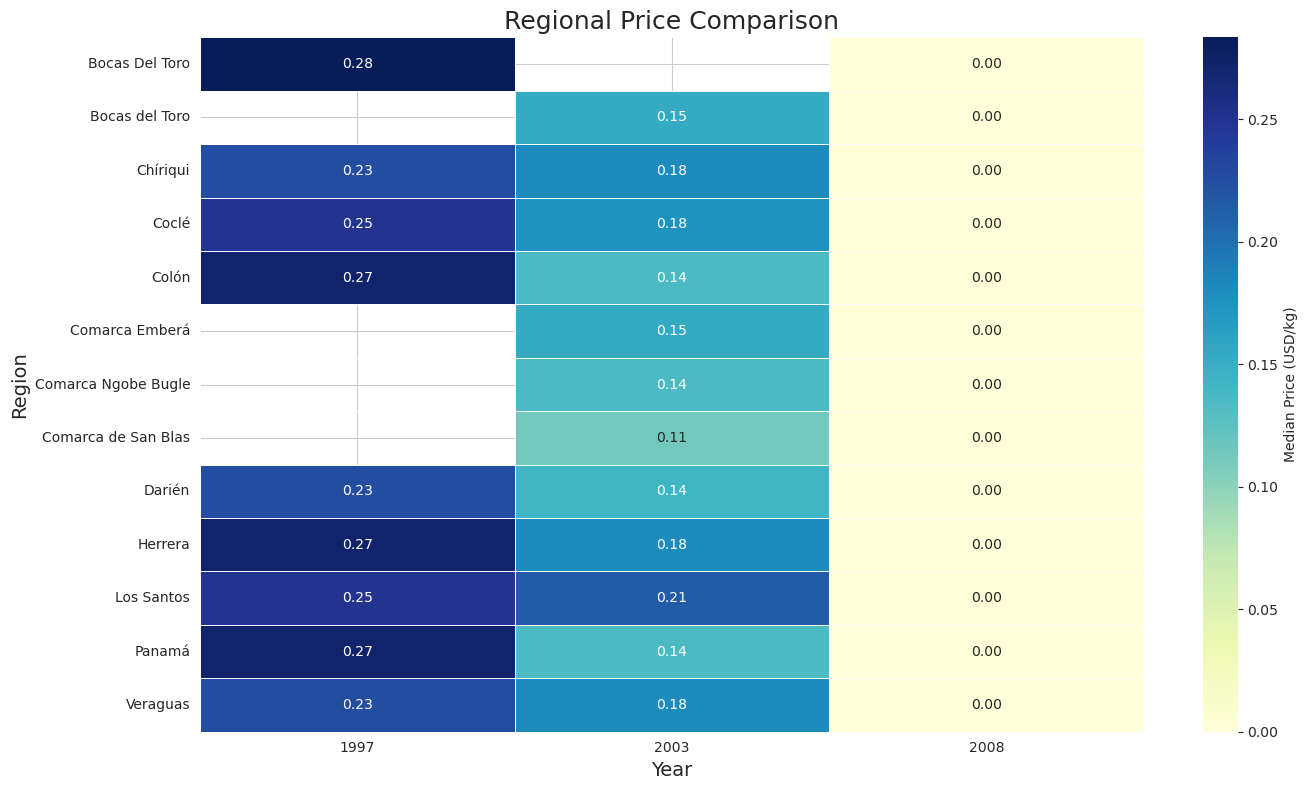

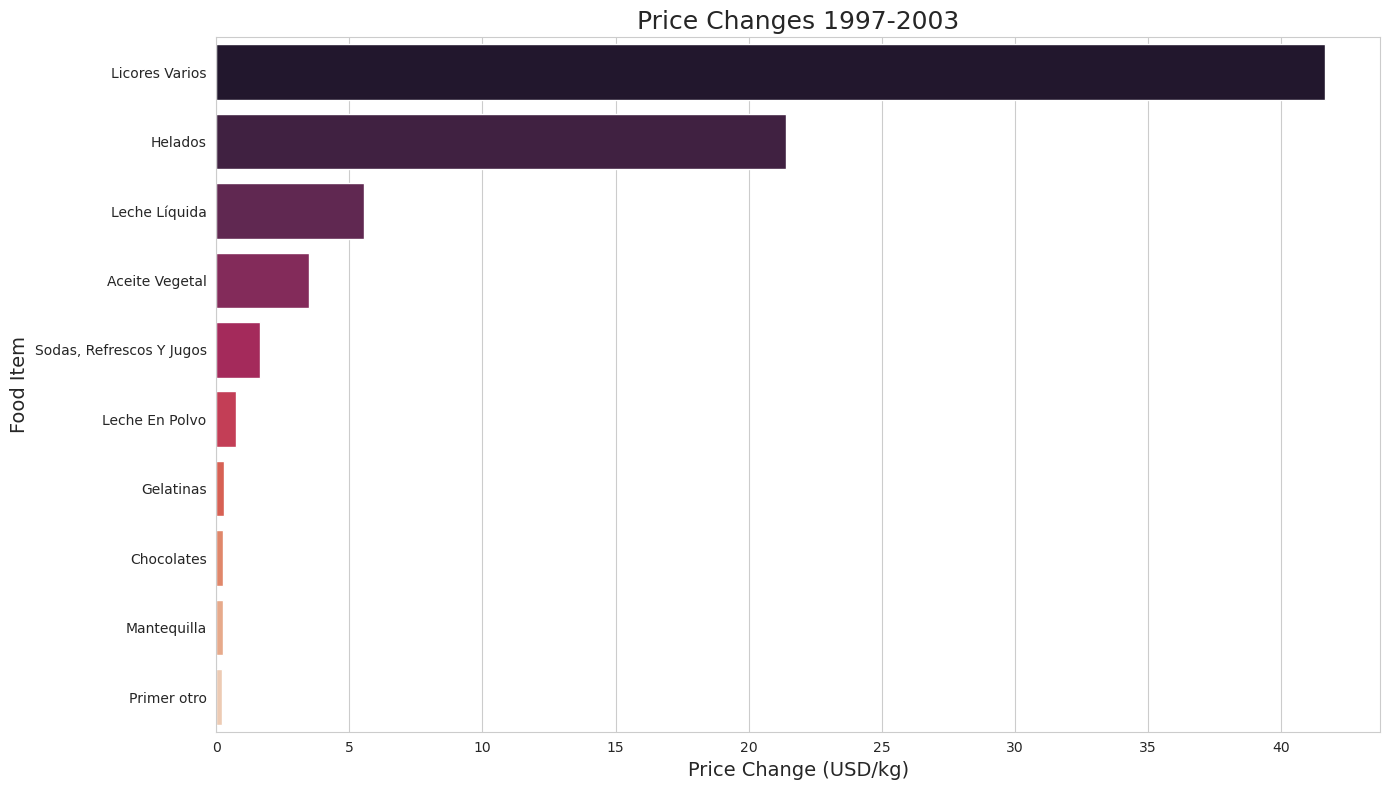

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Loading and Preparation
years = [1997, 2003, 2008]
data_frames = []

for year in years:
    try:
        file_path = f'Panama - Food Prices ({year}).csv'
        df = pd.read_csv(file_path)
        # Standardize column names
        df.columns = [col.strip().lower() for col in df.columns]
        data_frames.append(df)
    except FileNotFoundError:
        print(f"Warning: File for year {year} not found")
        continue

# Check if data was loaded
if not data_frames:
    raise ValueError("No data files found. Check file paths and names.")

# Combine datasets
combined = pd.concat(data_frames, ignore_index=True)

# 2. Data Cleaning and Validation
# Rename columns
combined = combined.rename(columns={
    't': 'year',
    'm': 'region',
    'j': 'food_item',
    'u': 'unit',
    'price': 'price_usd'
})

# Convert and validate years
combined['year'] = pd.to_numeric(combined['year'], errors='coerce')
combined = combined.dropna(subset=['year'])
combined['year'] = combined['year'].astype(int)

# Ensure we have required years
available_years = combined['year'].unique()
if not set(years).issubset(available_years):
    print(f"Warning: Missing years. Available years: {available_years}")

# Clean price data
combined['price_usd'] = pd.to_numeric(combined['price_usd'], errors='coerce')
combined = combined.dropna(subset=['price_usd'])

# 3. Visualization 1: Price Trends
plt.figure(figsize=(16, 9))
top_items = combined.groupby('food_item')['price_usd'].median().nlargest(8).index.tolist()

sns.lineplot(
    data=combined[combined['food_item'].isin(top_items)],
    x='year',
    y='price_usd',
    hue='food_item',
    style='food_item',
    markers=True,
    dashes=False,
    palette='husl',
    estimator='median',
    errorbar=None,
)

plt.title("Top Food Items Price Trends", fontsize=18, pad=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price (USD/kg)", fontsize=14)
plt.grid(alpha=0.2)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Visualization 2: Regional Comparison
# Ensure we have all years in index
all_years = pd.DataFrame(index=pd.Index(years, name='year'))

regional_data = (
    combined.groupby(['region', 'year'])['price_usd']
    .median()
    .unstack()
    .reindex(columns=years, fill_value=0)
)

plt.figure(figsize=(14, 8))
sns.heatmap(
    regional_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Median Price (USD/kg)'}
)
plt.title("Regional Price Comparison", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Region", fontsize=14)
plt.tight_layout()
plt.show()

# 5. Visualization 3: Price Changes
# Dynamic year handling
start_year = combined['year'].min()
end_year = combined['year'].max()

price_change = (
    combined.groupby(['food_item', 'year'])['price_usd']
    .median()
    .unstack()
    .fillna(0)
)

# Calculate change using available years
if start_year in price_change.columns and end_year in price_change.columns:
    price_change['price_change'] = price_change[end_year] - price_change[start_year]
    top_changes = price_change.nlargest(10, 'price_change')
    
    plt.figure(figsize=(14, 8))
    sns.barplot(
        x='price_change',
        y=top_changes.index,
        data=top_changes,
        palette="rocket"
    )
    plt.title(f"Price Changes {start_year}-{end_year}", fontsize=18)
    plt.xlabel("Price Change (USD/kg)", fontsize=14)
    plt.ylabel("Food Item", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print(f"Cannot calculate price changes between {start_year} and {end_year}")

<Figure size 2000x1200 with 0 Axes>

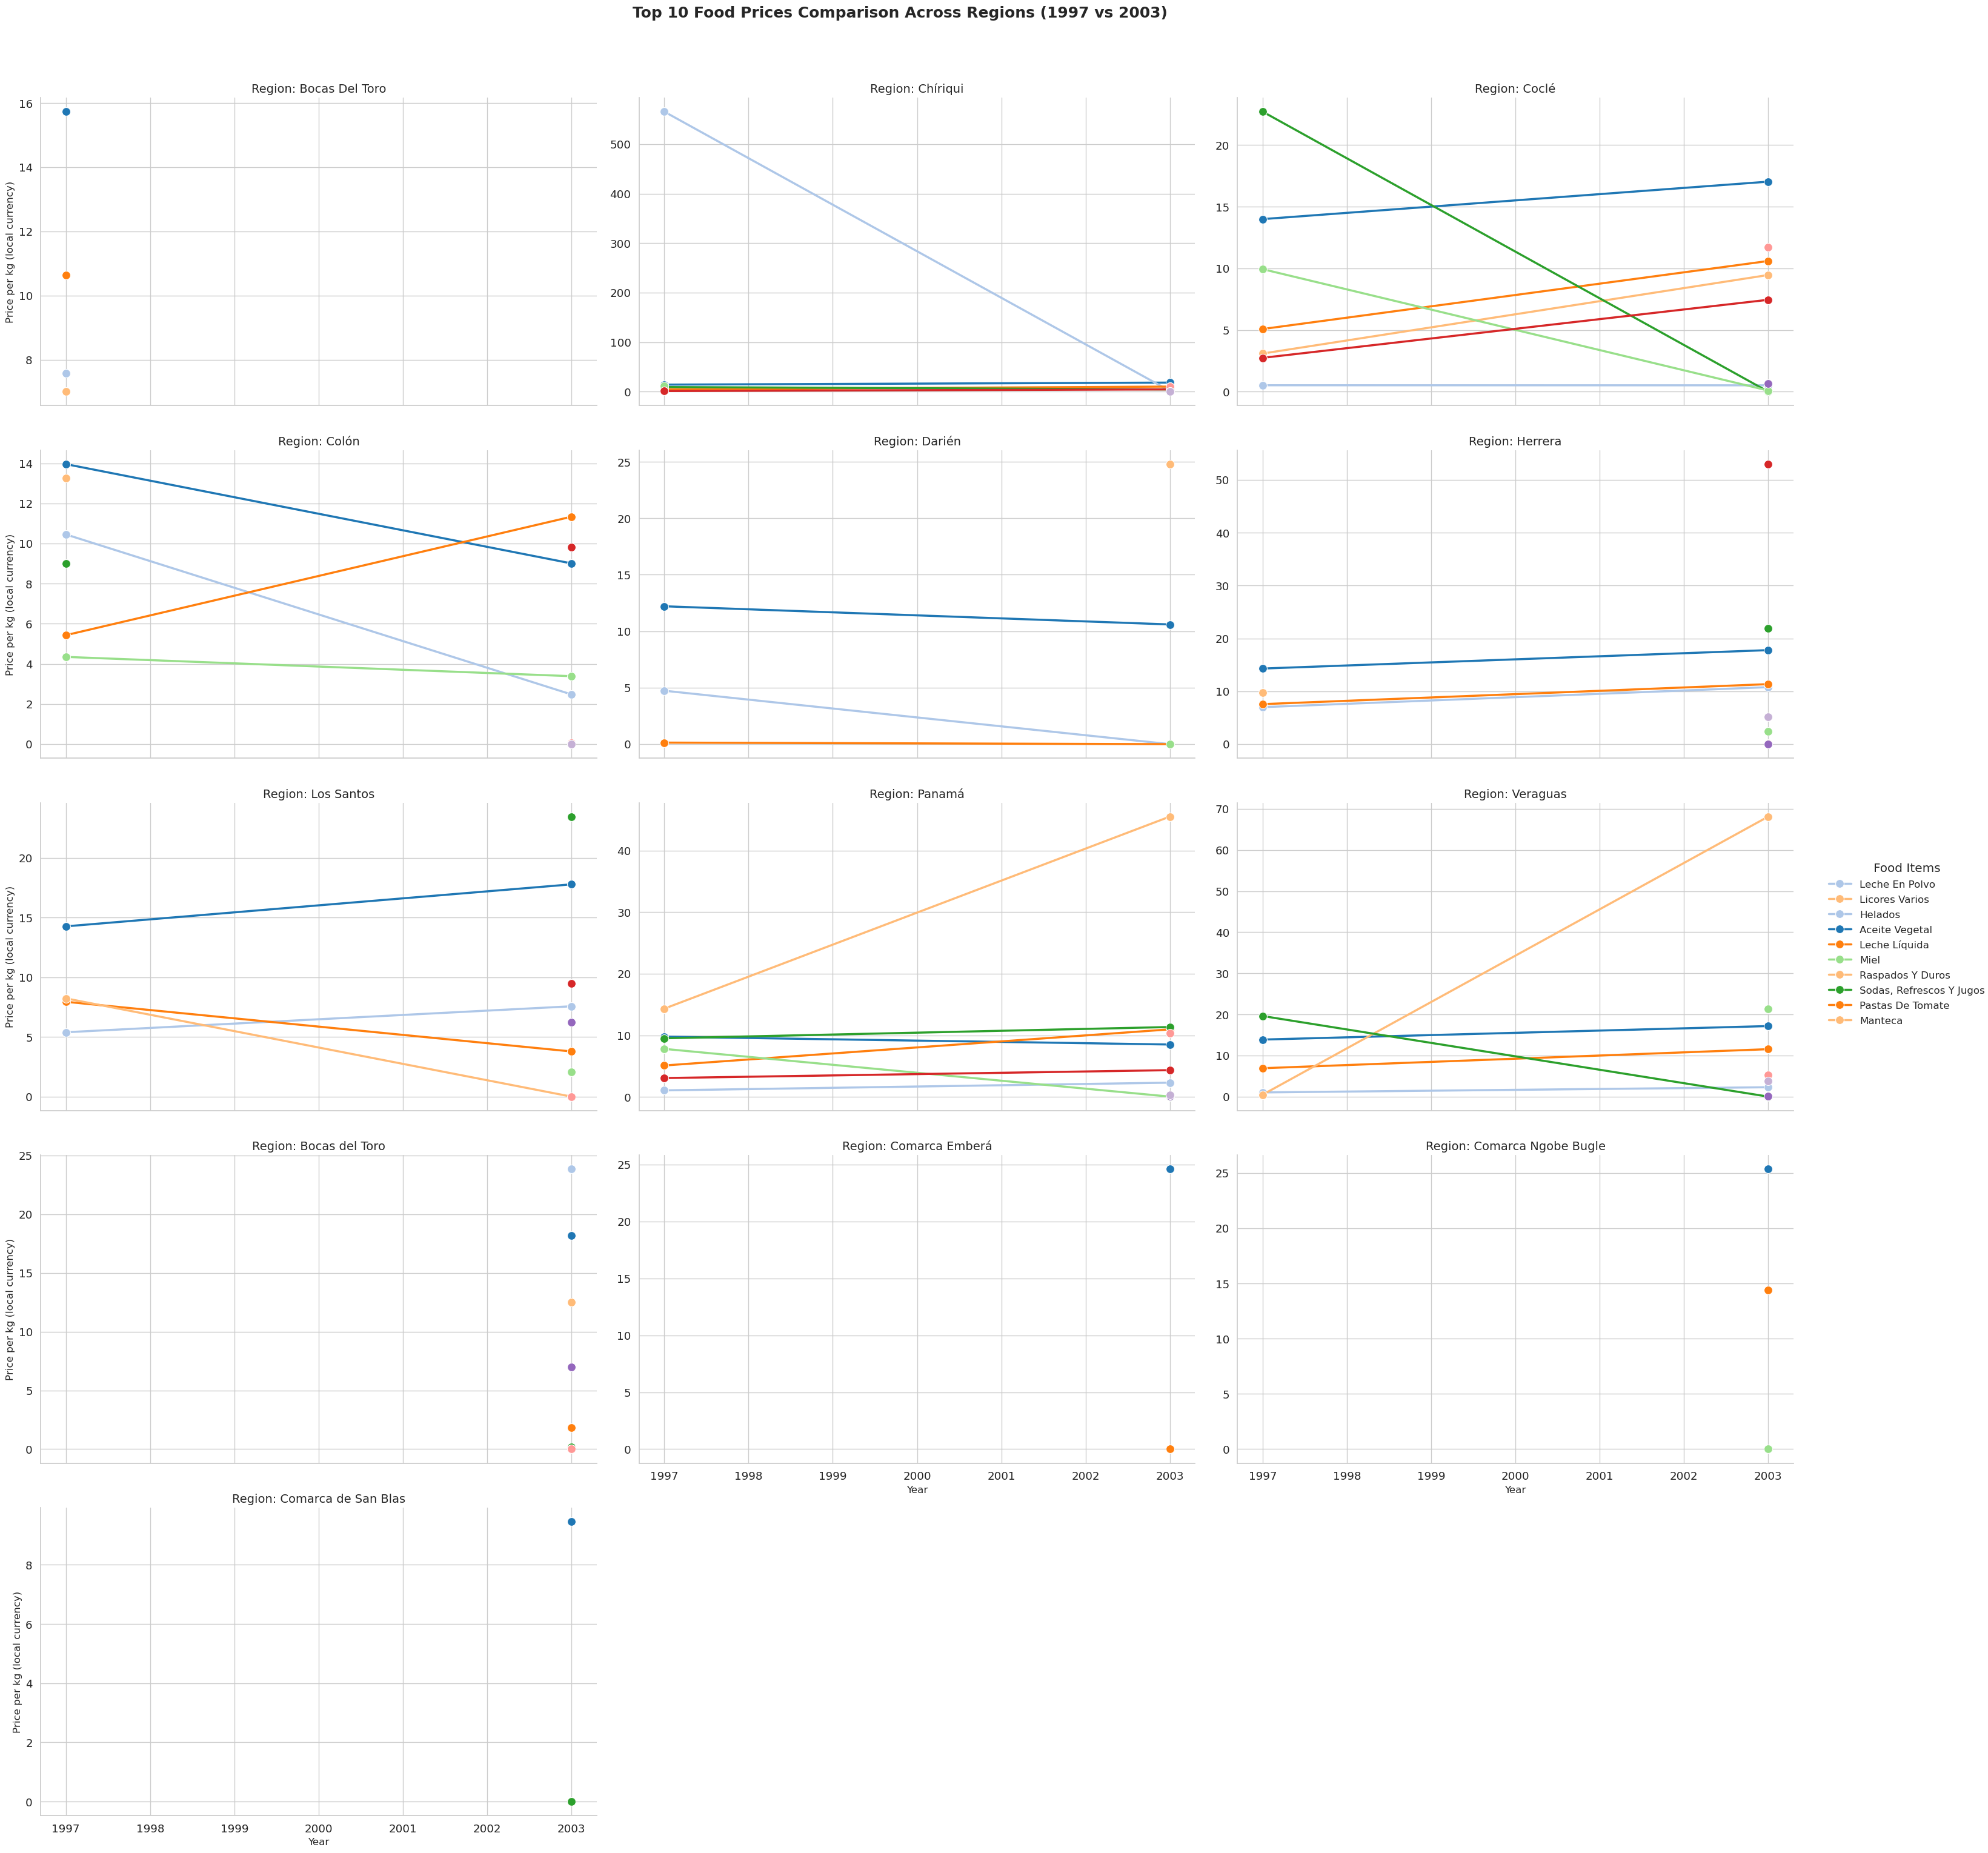

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_1997 = 'Panama - Food Prices (1997).csv'
file_path_2003 = 'Panama - Food Prices (2003).csv'

def load_and_preprocess(path, year):
    df = pd.read_csv(path)
    df.columns = [col.strip() for col in df.columns] 
    df['Year'] = year
    return df

prices_1997 = load_and_preprocess(file_path_1997, 1997)
prices_2003 = load_and_preprocess(file_path_2003, 2003)

combined = pd.concat([prices_1997, prices_2003])

top_items = combined.groupby('j')['Price'].mean().nlargest(10).index
filtered_data = combined[combined['j'].isin(top_items)]

plt.figure(figsize=(20, 12))  
sns.set_theme(style="whitegrid", font_scale=1.2) 

g = sns.FacetGrid(
    filtered_data,
    col="m",  
    col_wrap=3,  
    height=6,
    aspect=1.5,
    sharey=False
)
g.map_dataframe(
    sns.lineplot,
    x="Year",
    y="Price",
    hue="j",  
    palette="tab20",
    marker="o",
    markersize=10,
    linewidth=2.5
)

g.set_titles("Region: {col_name}", size=14)
g.set_axis_labels("Year", "Price per kg (local currency)", size=12)
g.add_legend(title="Food Items", label_order=top_items)
plt.suptitle("Top 10 Food Prices Comparison Across Regions (1997 vs 2003)", 
            y=1.02, fontsize=18, fontweight='bold')

legend = g.legend
legend.set_bbox_to_anchor((1.1, 0.5))  # 右侧居中
for text in legend.get_texts():
    text.set_fontsize(12)

plt.tight_layout()
plt.savefig('food_prices_comparison.png', dpi=300, bbox_inches='tight')
plt.show()